In [16]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
from collections import defaultdict
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import string
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [17]:
df = pd.read_csv('../data/final_df.csv')
df.head()

,Year,Name,Text,Target,text_lower,list_tokens,string_tokens,link
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0.0,"thank you very much, chris. and thanks to unl...","['thank', 'much', 'chris', 'thanks', 'unlv', '...",thank much chris thanks unlv hosting know thin...,NaN
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0.0,"well, thank you. are you a teacher? yes, i th...","['well', 'thank', 'teacher', 'yes', 'think', '...",well thank teacher yes think good question hea...,NaN
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0.0,"how are you, donald? [applause] well, thank ...","['donald', 'applause', 'well', 'thank', 'leste...",applause well thank lester thanks hofstra host...,NaN
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0.0,"i was going to applaud, too. well, thank you,...","['going', 'applaud', 'well', 'thank', 'jim', '...",going applaud well thank thanks people san die...,NaN
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0.0,"thank you, jim. and thank you to the people o...","['thank', 'jim', 'thank', 'people', 'hartford'...",thank thank people hartford host want begin sa...,NaN


In [18]:
df.shape

(119, 8)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           119 non-null    int64  
 1   Name           119 non-null    object 
 2   Text           118 non-null    object 
 3   Target         119 non-null    float64
 4   text_lower     86 non-null     object 
 5   list_tokens    119 non-null    object 
 6   string_tokens  118 non-null    object 
 7   link           47 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.6+ KB


In [20]:
df[df['list_tokens'].isna()]

,Year,Name,Text,Target,text_lower,list_tokens,string_tokens,link


In [21]:
row1 = df.iloc[18]
row2 = df.iloc[24]

df['list_tokens'][18] = row1['string_tokens'].split()
df['list_tokens'][24] = row2['string_tokens'].split()
df[df['list_tokens'].isna()]

/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_68846/964711886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['list_tokens'][18] = row1['string_tokens'].split()
/var/folders/px/v7992sbn36q0sd74xlm965340000gn/T/ipykernel_68846/964711886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['list_tokens'][24] = row2['string_tokens'].split()


,Year,Name,Text,Target,text_lower,list_tokens,string_tokens,link


In [22]:
df.iloc[24]

Year                                                          2008
Name                                                        MCCAIN
Text              Well, thank you, Jim. And thanks to everybody...
Target                                                         1.0
text_lower        well, thank you, jim. and thanks to everybody...
list_tokens      [well, thank, thanks, everybody, sad, note, to...
string_tokens    well thank thanks everybody sad note tonight s...
link                                                           NaN
Name: 24, dtype: object

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           119 non-null    int64  
 1   Name           119 non-null    object 
 2   Text           118 non-null    object 
 3   Target         119 non-null    float64
 4   text_lower     86 non-null     object 
 5   list_tokens    119 non-null    object 
 6   string_tokens  118 non-null    object 
 7   link           47 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.6+ KB


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           119 non-null    int64  
 1   Name           119 non-null    object 
 2   Text           118 non-null    object 
 3   Target         119 non-null    float64
 4   text_lower     86 non-null     object 
 5   list_tokens    119 non-null    object 
 6   string_tokens  118 non-null    object 
 7   link           47 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.6+ KB


In [25]:
import ast

# Function to convert string to list
def convert_string_to_list(string):
    try:
        return ast.literal_eval(string)
    except ValueError:
        return string  # returns the original string in case of an error

# Apply this function to the desired column
df['list_tokens'] = df['list_tokens'].apply(convert_string_to_list)

In [26]:
df['list_tokens'][1]

['well',
 'thank',
 'teacher',
 'yes',
 'think',
 'good',
 'question',
 'heard',
 'lot',
 'teacher',
 'parent',
 'concern',
 'thing',
 'said',
 'done',
 'campaign',
 'think',
 'important',
 'make',
 'clear',
 'child',
 'country',
 'really',
 'great',
 'good',
 'going',
 'respect',
 'one',
 'another',
 'lift',
 'going',
 'looking',
 'way',
 'celebrate',
 'diversity',
 'going',
 'try',
 'reach',
 'every',
 'boy',
 'girl',
 'well',
 'every',
 'adult',
 'bring',
 'working',
 'behalf',
 'country',
 'positive',
 'optimistic',
 'view',
 'together',
 'slogan',
 'campaign',
 'stronger',
 'together',
 'think',
 'work',
 'together',
 'overcome',
 'divisiveness',
 'sometimes',
 'set',
 'american',
 'one',
 'another',
 'instead',
 'make',
 'big',
 'goal',
 'set',
 'forth',
 'big',
 'goal',
 'getting',
 'economy',
 'work',
 'everyone',
 'top',
 'making',
 'sure',
 'best',
 'education',
 'system',
 'preschool',
 'college',
 'making',
 'affordable',
 'much',
 'else',
 'set',
 'goal',
 'together',
 'tr

In [27]:
df['string_tokens']= [" ".join(x) for x in df['list_tokens']]

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           119 non-null    int64  
 1   Name           119 non-null    object 
 2   Text           118 non-null    object 
 3   Target         119 non-null    float64
 4   text_lower     86 non-null     object 
 5   list_tokens    119 non-null    object 
 6   string_tokens  119 non-null    object 
 7   link           47 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.6+ KB


In [29]:
df['string_tokens'][1]

'well thank teacher yes think good question heard lot teacher parent concern thing said done campaign think important make clear child country really great good going respect one another lift going looking way celebrate diversity going try reach every boy girl well every adult bring working behalf country positive optimistic view together slogan campaign stronger together think work together overcome divisiveness sometimes set american one another instead make big goal set forth big goal getting economy work everyone top making sure best education system preschool college making affordable much else set goal together try achieve nothing opinion america hope come together campaign obviously hoping earn vote hoping elected november promise work every american want president american regardless political belief come look like religion want heal country bring together think best way get future child grandchild deserve well like everyone else spent lot time thinking last hour heard saw know

## Tuning a Multinomial Naive Bayes Classifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df["string_tokens"], df['Target'], random_state=42)

In [35]:
pipe = Pipeline(steps=[
    ('tfidf', TfidfVectorizer()), 
    ('mnb', MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [36]:
cross_val_score(pipe, X_train, y_train)

array([0.55555556, 0.5       , 0.77777778, 0.66666667, 0.47058824])

In [37]:
pipe.score(X_test, y_test)

0.5333333333333333

In [38]:
def evaluate_grid(gs):
    y_pred = gs.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    print("Best Params: " + str(gs.best_params_)) 
    print("Best CV Accuracy: " + str(gs.best_score_)) 
    print("Best Training Accuracy: " + str(gs.score(X_train, y_train)))

In [39]:
def plot_cm(y_test, gs):
    '''
    Takes in true values and predicted values and plots a confusion matrix
    '''
    y_pred = gs.predict(X_test)    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dem', 'rep'])
    disp.plot();

In [40]:
gs = GridSearchCV(pipe, param_grid= {
    'tfidf__max_df': [0.75, 0.9, 1.0], # default 1.0
    'tfidf__min_df': [0.0, 0.05, 0.1], # default 1
    'tfidf__ngram_range': [(1, 1), (1, 2)], # default (1,1)
    'tfidf__max_features': [None, 2, 20], # default (None)
    'tfidf__norm': ['l1', 'l2', None]
}, n_jobs=-4)

In [41]:
gs.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-4,
             param_grid={'tfidf__max_df': [0.75, 0.9, 1.0],
                         'tfidf__max_features': [None, 2, 20],
                         'tfidf__min_df': [0.0, 0.05, 0.1],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__norm': ['l1', 'l2', None]})

In [42]:
evaluate_grid(gs)

Best Params: {'tfidf__max_df': 0.75, 'tfidf__max_features': None, 'tfidf__min_df': 0.0, 'tfidf__ngram_range': (1, 2), 'tfidf__norm': None}
Best CV Accuracy: 0.8196078431372549
Best Training Accuracy: 0.9887640449438202


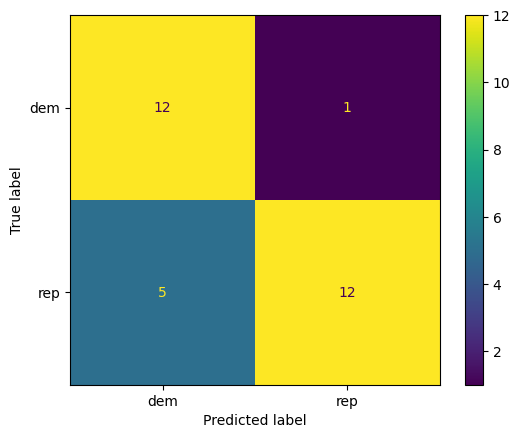

In [43]:
plot_cm(y_test, gs)

In [44]:
gs2 = GridSearchCV(pipe, param_grid= {
    'tfidf__max_df': [0.65, 0.75, 0.85], # earlier 0.75 was best
    'tfidf__min_df': [0.0], # 0.0 was best
    'tfidf__ngram_range': [(1, 2), (2,2), (1,3)], # default (1,1)
   'tfidf__max_features': [None, 1], # default (None) was best so commenting it out
    'tfidf__norm': [None] # None was best
}, n_jobs=-2)
gs2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-2,
             param_grid={'tfidf__max_df': [0.65, 0.75, 0.85],
                         'tfidf__max_features': [None, 1],
                         'tfidf__min_df': [0.0],
                         'tfidf__ngram_range': [(1, 2), (2, 2), (1, 3)],
                         'tfidf__norm': [None]})

In [45]:
evaluate_grid(gs2)

Best Params: {'tfidf__max_df': 0.65, 'tfidf__max_features': None, 'tfidf__min_df': 0.0, 'tfidf__ngram_range': (2, 2), 'tfidf__norm': None}
Best CV Accuracy: 0.85359477124183
Best Training Accuracy: 0.9887640449438202


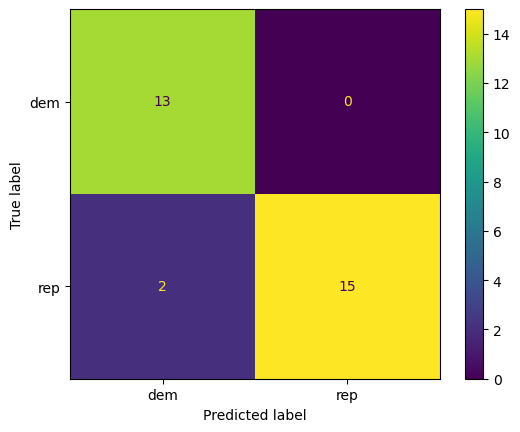

In [46]:
plot_cm(y_test, gs2)

In [47]:
gs3 = GridSearchCV(pipe, param_grid= {
    'tfidf__max_df': [0.55, 0.65, 0.70], # earlier 0.5 was best
    'tfidf__min_df': [0.0], # 0.0 was best
    'tfidf__ngram_range': [(1,3), (2,3)], # default (1,1)
   #'tfidf__max_features': [None, 2, 20], # default (None) was best so commenting it out
    'tfidf__norm': [None] # None was best
}, n_jobs=-2)
gs3.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-2,
             param_grid={'tfidf__max_df': [0.55, 0.65, 0.7],
                         'tfidf__min_df': [0.0],
                         'tfidf__ngram_range': [(1, 3), (2, 3)],
                         'tfidf__norm': [None]})

In [48]:
evaluate_grid(gs3)

Best Params: {'tfidf__max_df': 0.55, 'tfidf__min_df': 0.0, 'tfidf__ngram_range': (2, 3), 'tfidf__norm': None}
Best CV Accuracy: 0.8869281045751632
Best Training Accuracy: 0.9887640449438202


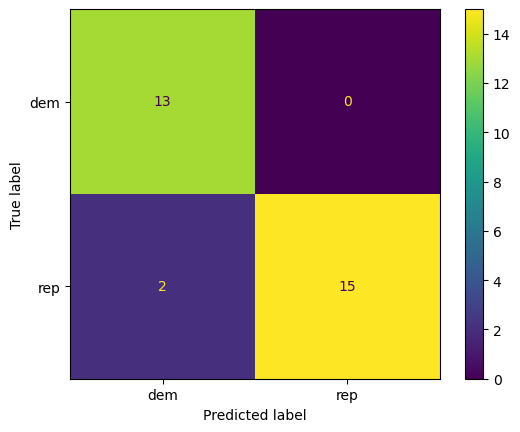

In [49]:
plot_cm(y_test, gs3)

In [50]:
gs_mnb = GridSearchCV(estimator=pipe, param_grid = {'mnb__alpha': [0, 0.01, 0.1, 1], 'mnb__force_alpha': [True]},
                     cv=7, n_jobs=-4)
gs_mnb.fit(X_train, y_train)

/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-4,
             param_grid={'mnb__alpha': [0, 0.01, 0.1, 1],
                         'mnb__force_alpha': [True]})

In [51]:
evaluate_grid(gs_mnb)

Best Params: {'mnb__alpha': 0.1, 'mnb__force_alpha': True}
Best CV Accuracy: 0.7060439560439561
Best Training Accuracy: 0.9887640449438202


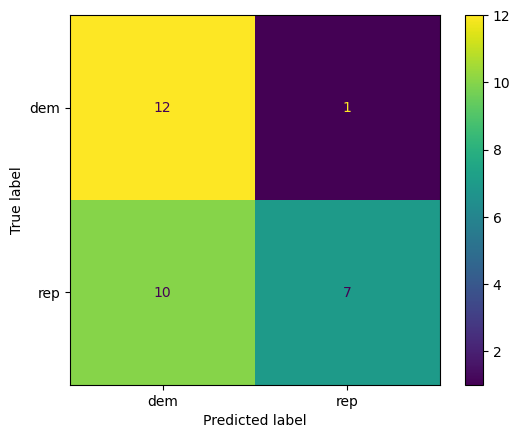

In [52]:
plot_cm(y_test, gs_mnb)

In [53]:
gs_params_full = {
    'tfidf__max_df': [0.75, 0.9, 1.0], # default 1.0
    'tfidf__min_df': [0.0, 0.05, 0.1], # default 1
    'tfidf__ngram_range': [(1, 1), (1, 2)], # default (1,1)
    'tfidf__max_features': [None, 2, 20], # default (None)
    'tfidf__norm': ['l1', 'l2', None],
    'mnb__alpha': [0, 0.01, 0.1, 1], 
    'mnb__force_alpha': [True]
}

gs_full = GridSearchCV(estimator=pipe, param_grid=gs_params_full, n_jobs=-2, verbose=2)
gs_full.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.

[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   0.1s
[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   0.1s
[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=(1, 1), tfidf__norm=None; total time=   0.1s
[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   0.5s
[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   0.5s
[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.05, tfidf__ngram_range=(1

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-2,
             param_grid={'mnb__alpha': [0, 0.01, 0.1, 1],
                         'mnb__force_alpha': [True],
                         'tfidf__max_df': [0.75, 0.9, 1.0],
                         'tfidf__max_features': [None, 2, 20],
                         'tfidf__min_df': [0.0, 0.05, 0.1],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__norm': ['l1', 'l2', None]},
             verbose=2)

In [54]:
evaluate_grid(gs_full)

Best Params: {'mnb__alpha': 1, 'mnb__force_alpha': True, 'tfidf__max_df': 0.75, 'tfidf__max_features': None, 'tfidf__min_df': 0.0, 'tfidf__ngram_range': (1, 2), 'tfidf__norm': None}
Best CV Accuracy: 0.8196078431372549
Best Training Accuracy: 0.9887640449438202


In [55]:
gs_params_full2 = {
    'tfidf__max_df': [0.25, 0.40, 0.55, 0.75, 0.9], 
    'tfidf__min_df': [0.0], 
    'tfidf__ngram_range': [(1, 2), (1, 3), (2, 3)], 
    'tfidf__max_features': [None], 
    'tfidf__norm': ['l1', 'l2', None],
    'mnb__alpha': [0, 0.001, 0.01, 0.1], 
    'mnb__force_alpha': [True]
}

gs_full2 = GridSearchCV(estimator=pipe, param_grid=gs_params_full2, n_jobs=-2, verbose=2)
gs_full2.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/nathan/miniconda3/envs/learn-env-tensor/lib/python3.9/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.

[CV] END mnb__alpha=1, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=2, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=None; total time=   0.1s
[CV] END mnb__alpha=1, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=2, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=None; total time=   0.1s
[CV] END mnb__alpha=1, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=2, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   0.6s
[CV] END mnb__alpha=1, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=2, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=None; total time=   0.6s
[CV] END mnb__alpha=1, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=20, tfidf__min_df=0.0, tfidf__ngram_range=(1, 1), tfidf__norm=None; total time=   0.1s
[CV] END mnb__alpha=1, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=20, tfidf__min_df=0.0, tfidf__ngram_range=(1, 1), tfidf

GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             n_jobs=-2,
             param_grid={'mnb__alpha': [0, 0.001, 0.01, 0.1],
                         'mnb__force_alpha': [True],
                         'tfidf__max_df': [0.25, 0.4, 0.55, 0.75, 0.9],
                         'tfidf__max_features': [None], 'tfidf__min_df': [0.0],
                         'tfidf__ngram_range': [(1, 2), (1, 3), (2, 3)],
                         'tfidf__norm': ['l1', 'l2', None]},
             verbose=2)

In [56]:
evaluate_grid(gs_full2)

Best Params: {'mnb__alpha': 0.001, 'mnb__force_alpha': True, 'tfidf__max_df': 0.25, 'tfidf__max_features': None, 'tfidf__min_df': 0.0, 'tfidf__ngram_range': (2, 3), 'tfidf__norm': 'l2'}
Best CV Accuracy: 0.8869281045751632
Best Training Accuracy: 0.9887640449438202


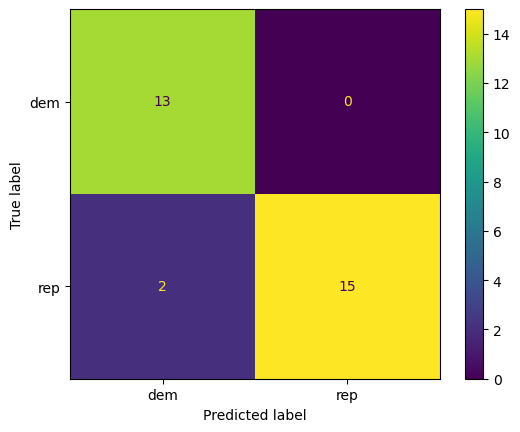

In [76]:
plot_cm(y_test, gs_full2).savefig('../images/')

## Remodeling with certain words removed

In [57]:
df_lw = pd.read_csv('../data/df_morestops.csv')
df_lw['tokens'] = df_lw['tokens'].apply(ast.literal_eval)

In [58]:
len(df_lw['tokens'][0]), len(df['list_tokens'][0])

(2944, 3009)

In [75]:
df_lw['num_tokens'] = [len(row) for row in df_lw['tokens']]
df_lw.head()

,Year,Name,Text,Target,tokens,tfidf,proba,prob_0,prob_1,difference,num_tokens
0,2016,H_CLINTON,"Thank you very much, Chris. And thanks to UNL...",0,"[thank, much, chris, thanks, unlv, hosting, kn...","[0.03049070318453088, 0.01515844012268362, 0.0...","[0.5494275777692055, 0.45057242223079935]",0.549428,0.450572,0.098855,2944
1,2016,H_CLINTON,"Well, thank you. Are you a teacher? Yes, I th...",0,"[well, thank, teacher, yes, think, good, quest...","[0.020841211844380064, 0.01726866601027197, 0....","[0.5535075251138659, 0.44649247488612553]",0.553508,0.446492,0.107015,2602
2,2016,H_CLINTON,"How are you, Donald? [applause] Well, thank ...",0,"[applause, well, thank, lester, thanks, hofstr...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4575038307774119, 0.5424961692225821]",0.457504,0.542496,-0.084992,2815
3,1996,B_CLINTON,"I was going to applaud, too. Well, thank you,...",0,"[going, applaud, well, thank, thanks, people, ...","[0.04091355243065081, 0.01452868228093074, 0.0...","[0.6128845748313667, 0.38711542516862973]",0.612885,0.387115,0.225769,3209
4,1996,B_CLINTON,"Thank you, Jim. And thank you to the people o...",0,"[thank, thank, people, hartford, host, want, b...","[0.048248915253858486, 0.026652141890730917, 0...","[0.6182400145047409, 0.3817599854952474]",0.618240,0.381760,0.236480,3370


In [59]:
rnf = RandomForestClassifier()
rnf.fit(X_train, y_train)

ValueError: could not convert string to float: 'well first agree senator kennedy cuba lost certainly china lost administration came power 1953 look cuba today believe following right course course difficult course circumstance proper one see cuban people get chance realize aspiration progress freedom get cooperation organi state organization american state senator kennedy made strong criticism part alleged part happened cuba point fact visited cuba batista power point going judge administration term attitude toward dictator glad comparison previous administration eleven dictator south america central america came 1953 today three left including one cuba think pretty good progress senator kennedy also indicated regard cuba thought made mistake cuba calling free election country surprised senator kennedy foreign relation committee would made statement kind matter fact book strategy peace took right position position united state treaty treaty organization american state prohibits interfering internal affair state prohibits well made statement would direct opposition treaty regard cuba let make one thing clear question defend right question defend guantanamo attacked also question free people cuba people want free going supported attain freedom cuba lost think kind defeatist talk senator kennedy help situation one bit think kenne senator kennedy wrong three count first wrong thinking even suggesting khrushchev might continued conference expressed regret knew flight going long reason broke conference second wrong analogy make united state strong country whenever anything wrong express regret president united state something right something purpose defending security country surprise attack never express regret apologize anybody including khrushchev connection senator kennedy criticized president ground expressing regret allowed flight take place summit conference immediately summit conference occurred seems criticism wrong part remember pearl harbor lost three thousand american life cannot afford intelligence gap want make position absolutely clear regard getting intelligence information intend see united state ever position negotiating soviet union discontinue intelligence effort intend ever express regret khrushchev anybody else something support congress right purpose protecting security united state intention field civil right spelled republican platform think make progress first field employment would give statutory authority committee government contract effective way getting real progress made area since one every four job held allotted people government contract certainly think agree anybody government contract certainly money spent contract ought disbursed equally without regard race creed color individual employed second field school believe provision whereby federal government would give assistance district want integrate school course rejected government contract provision special session congress kennedy quite active far area concerned think look presidential leadership speak presidential leadership refer example attitude sit strike situation cause concern cause concern denial right people equality think belongs everybody talked negro mother heard explain try explain tell child store buy loaf bread store sit counter get coca cola wrong something circumstance well attorney general united state direction president call owner chain store get take action place executive lead let sum saying talk every time south civil right preaching people south southern problem northern problem western problem problem responsibility leadership solve problem together right time particularly khrushchev country man enslaved million man slaughtered thousand cannot continue situation point finger united state america say denying right citizen say candidate vice presidential candidate would hope well including senator johnson talk issue every opportunity senator kennedy expressed hope field hope think american would share want problem progress area let look performance selected vice presidential running mate selected man voted proposal opposes present time let look also selected man stand field talk work senator referred committee government contract yet committee chairman handicapped fact adequate fund adequate power adequate staff special session congress also session preceded democratic congress two one democratic majority asked president give fund give power job nothing special session senator kennedy calling signal along senator johnson turned voted giving power despite fact bill already considered already hearing congress already knew say need high hope need action field executive leadership say believe essential president united state set tone also must lead must act talk morgan matter well cold war well always case long communist international scene aggressive tac tendency presently following far present situation concerned think time nail distortion united state put first hear prestige time low senator kennedy hitting point would suggest premier kush khrushchev performance united nation compared president eisenhower eloquent speech present time communist prestige world time low american prestige time high course one factor significant one look example vote congo one side side happened seventy vote position none look vote united nation past seven half year test prestige every time united state one side side position sustained looking ought future cold war recognize fought develop program deal fought primarily asia africa latin america need tool need fight well need example economic assistance need technical assistance need exchange need program diplomatic character effective area senator kennedy moment ago referred fact adequate voice america program latin america like point last six year democratic congress member cut twenty million dollar voice america program also cut four billion dollar mutual security last six year also cut two billion dollar defense talk record well recognize stand record well let summarize saying satisfied cold war believe step activity launch offensive mind heart soul men must economic must technological must ideological got get help congress order senator kennedy put great deal stress necessity economic assistance important also tremendously important bear mind pour money without pouring technical assistance well disastrous situation need step exchange need step technical assistance trained people newly developing country operate economy also mind something else regard whole situation world america move forward must think term fighting communism must also think primarily term interest country must associate aspiration must let know great american ideal independence right people free right progress ideal belong alone belong everybody must get across world unless adequate fund example information cut congress adequate fund technical assistance point would make regard economic assistance technical assistance united state must rest case alone primarily ideological battle battle mind heart soul men must meet communist purely field gross atheistic materialism must stand ideal combat unemployment first must concentrate area refer called depressed area last congress special session congress bill one president one senator kennedy member party bill president submitted would provided aid area really need area like scranton wilkes barre area west virginia one senator kennedy supporting hand found bill got legislative difficulty consequently action taken point one highest priority must get bill depressed area next congress made recommendation discussed previously spell campaign second consider problem unemployment realize analyzing figure find unemployment exists among older citizen exists also among inadequately trained adequate opportunity education also exists among minority group going combat unemployment better job area program education program case equal job opportunity one would also deal older citizen finally regard whole problem combating recession call must use full resource government respect one must see credit expanded recessionary period understand believe going recession believe economy sound going move second addition get recessionary period move part economy represented private sector mean stimulate part economy create job private sector economy mean tax reform necessary tax cut stimulate job favor rather massive federal spending program come effect usually long passed recessionary period must use weapon purpose combating recession come expect come well first think senator kennedy make mind regard responsibility first debate indicated experience least participated significantly making decision glad hear tonight suggest experience let make position ear participated discussion leading decision administration proud record administration stand something stand something build looking senator kennedy credential suggesting move america faster offer offer retread program failed submit look program program example regard federal reserve free money loose money high low interest rate program economic field generally program adopted tried truman administration compare economic progress country truman administration eisenhower administration find every index great deal performance progress administration one say program leadership failed program leadership america need say american people want back policy incidentally senator kennedy disagrees indicate belief policy different advocating today course talked prime minister macmillan would appropriate president still going president next four month course one could commit country period far summit conference concerned want make position absolutely clear would willing president meet khrushchev world leader would serve cause peace would able wou would willing meet however unless preparation conference would give reasonable certainty reasonable certainty going success must build hope world dash case paris khrushchev came conference determined break going break would knew going get way berlin key matter concerned paris conference going another summit conference must negotiation diplomatic level ambassador secretary state others level prior time delineate issue prepare way head state meet make progress otherwise find head state meeting making progress find cause peace hurt rather helped circumstance therefore strongly urge strongly hold opportunity urge hold position summit conference would gone careful preparation khrushchev disgraceful conduct paris disgraceful conduct united nation gave assurance really wanted sit talk accomplish something make propaganda well think illusion whatever responsibility american people sixty expenditure defense expenditure mutual security expenditure economic assistance technical assistance going get le opinion going greater think may necessary tax hope hope economize elsewhere would hesitation ask american people pay tax even l961 necessary maintain sound economy also maintain sound dollar tax tax enough pay outgo pay many time higher price inflation simply think also add far senator kennedy proposal concerned intends carry platform one adopted los angeles impossible make good promise without raising tax without rise price platform suggests done economic growth done effect mirror going working way add billion dollar expenditure pay paid money paid people money pointed 1952 made clear far korean war concerned felt decision war korea right necessary criticized policy made necessary korea incidentally point senator kennedy attacked foreign policy said policy led defeat retreat like know defeated retreated truman administration six hundred million people went behind iron curtain including satellite country eastern europe communist china administration stopped quemoy matsu stopped indochina stopped lebanon stopped part world would also like point far senator kennedy comment concerned think perfect right responsibility criticize administration whenever think wrong responsibility accurate misstate case think say prestige time low think harmful time khrushchev harmful wrong think helpful suggested glad corrected extent seventeen million people bed hungry every night united state true people bed hungry united state far le incidentally used bed hungry came power end truman administration thing right united state emphasized le people bed hungry united state major country world best fed best clothed better distribution world good people people history pointing thing wrong think ought emphasize america strength necessary run america order build get absolutely clear senator kennedy must candidate candidate fifty two criticize wrong effective job way hand responsibility accurate responsibility correct every time misstates case intend continue'

[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=(1, 2), tfidf__norm=None; total time=   0.6s
[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=(1, 3), tfidf__norm=l2; total time=   1.2s
[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=(1, 3), tfidf__norm=None; total time=   1.2s
[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=(2, 3), tfidf__norm=l2; total time=   1.1s
[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.75, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=(2, 3), tfidf__norm=None; total time=   1.0s
[CV] END mnb__alpha=0, mnb__force_alpha=True, tfidf__max_df=0.9, tfidf__max_features=None, tfidf__min_df=0.0, tfidf__ngram_range=